# UZAIR REHMAN

# Importing Necessary Libraries

In [29]:
# Import the Pandas library and alias it as 'pd' for easier reference
import pandas as pd

# Import the NumPy library and alias it as 'np' for easier reference
import numpy as np

# Import the 'DecisionTreeClassifier' class from the 'sklearn.tree' module for classification using decision trees
from sklearn.tree import DecisionTreeClassifier

# Import 'train_test_split' and 'GridSearchCV' from the 'sklearn.model_selection' module
# 'train_test_split' is used for splitting datasets into training and testing sets
# 'GridSearchCV' is used for hyperparameter tuning through grid search
from sklearn.model_selection import train_test_split, GridSearchCV

# Import various metrics from 'sklearn' for evaluating machine learning models
# 'metrics' includes common evaluation metrics like mean squared error (MSE)
# 'accuracy_score' is for calculating accuracy scores
from sklearn import metrics
from sklearn.metrics import accuracy_score

# Importing Dataset

In [30]:
# Reading the Iris dataset
df = pd.read_csv('iris.csv')

df.sample(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
121,122,5.6,2.8,4.9,2.0,Iris-virginica
112,113,6.8,3.0,5.5,2.1,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
4,5,5.0,3.6,1.4,0.2,Iris-setosa
105,106,7.6,3.0,6.6,2.1,Iris-virginica


In [31]:
# Creating a new dataFrame without first column
df = df.iloc[:,1:]
df.sample(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
49,5.0,3.3,1.4,0.2,Iris-setosa
120,6.9,3.2,5.7,2.3,Iris-virginica
46,5.1,3.8,1.6,0.2,Iris-setosa
63,6.1,2.9,4.7,1.4,Iris-versicolor
133,6.3,2.8,5.1,1.5,Iris-virginica


In [32]:
# Assuming you have a DataFrame 'df' with 'Species' column containing values like 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'

# Remove the "Iris-" prefix from the 'Species' column
df['Species'] = df['Species'].str.replace('Iris-', '')

# Now, your 'Species' column will have values like 'setosa', 'versicolor', 'virginica'
df.sample(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
42,4.4,3.2,1.3,0.2,setosa
68,6.2,2.2,4.5,1.5,versicolor
21,5.1,3.7,1.5,0.4,setosa
36,5.5,3.5,1.3,0.2,setosa
26,5.0,3.4,1.6,0.4,setosa


In [33]:
# Apply label encoding to the 'Species' column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])
df.sample(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
118,7.7,2.6,6.9,2.3,2
28,5.2,3.4,1.4,0.2,0
124,6.7,3.3,5.7,2.1,2
133,6.3,2.8,5.1,1.5,2
142,5.8,2.7,5.1,1.9,2


In [34]:
# Shape of the dataset
df.shape

(150, 5)

# Train Test Split

In [35]:
# Extract the features (X) from the DataFrame 'df'
# We use iloc to select all rows and columns 0 through 4 (excluding column 4)
X = df.iloc[:, 0:4]

# Extract the target variable (y) from the DataFrame 'df'
# We use iloc to select all rows and column 4
y = df.iloc[:, 4]

In [36]:
# Split the dataset into training and testing sets
# X_train and X_test will contain the feature data for training and testing, respectively
# y_train and y_test will contain the corresponding target variable data
# The 'test_size' parameter specifies the proportion of data to be used for testing (25% in this case)
# The 'random_state' parameter ensures reproducibility by using the same seed (42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Decision Tree Classifier

In [37]:
clf = DecisionTreeClassifier()

In [38]:
# Train the DecisionTreeClassifier model 'clf' on the training data
# 'X_train' contains the feature data for training
# 'y_train' contains the corresponding target variable data

clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [39]:
# Use the trained DecisionTreeClassifier model 'clf' to make predictions on the test data
# 'X_test' contains the feature data for testing
# 'y_pred' will contain the predicted target variable values

y_pred = clf.predict(X_test)

In [40]:
# Perform cross-validation and calculate the average cross-validation score

# Use cross_val_score to perform 15-fold cross-validation with the Decision tree Classifier
# and calculate a score for each fold
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(clf, X, y, cv=15)

# Calculate and print the average cross-validation score
print(f'Average Cross-Validation Score: {cv_scores.mean():.2f}')

Average Cross-Validation Score: 0.95


# Plotting Tree

[Text(0.3076923076923077, 0.9285714285714286, 'PetalLengthCm <= 2.45\ngini = 0.666\nsamples = 112\nvalue = [35, 39, 38]\nclass = versicolor'),
 Text(0.23076923076923078, 0.7857142857142857, 'gini = 0.0\nsamples = 35\nvalue = [35, 0, 0]\nclass = setosa'),
 Text(0.38461538461538464, 0.7857142857142857, 'PetalLengthCm <= 4.75\ngini = 0.5\nsamples = 77\nvalue = [0, 39, 38]\nclass = versicolor'),
 Text(0.15384615384615385, 0.6428571428571429, 'PetalWidthCm <= 1.65\ngini = 0.056\nsamples = 35\nvalue = [0, 34, 1]\nclass = versicolor'),
 Text(0.07692307692307693, 0.5, 'gini = 0.0\nsamples = 34\nvalue = [0, 34, 0]\nclass = versicolor'),
 Text(0.23076923076923078, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = virginica'),
 Text(0.6153846153846154, 0.6428571428571429, 'PetalWidthCm <= 1.75\ngini = 0.21\nsamples = 42\nvalue = [0, 5, 37]\nclass = virginica'),
 Text(0.38461538461538464, 0.5, 'PetalLengthCm <= 4.95\ngini = 0.5\nsamples = 8\nvalue = [0, 4, 4]\nclass = versicolor'),
 Text(0

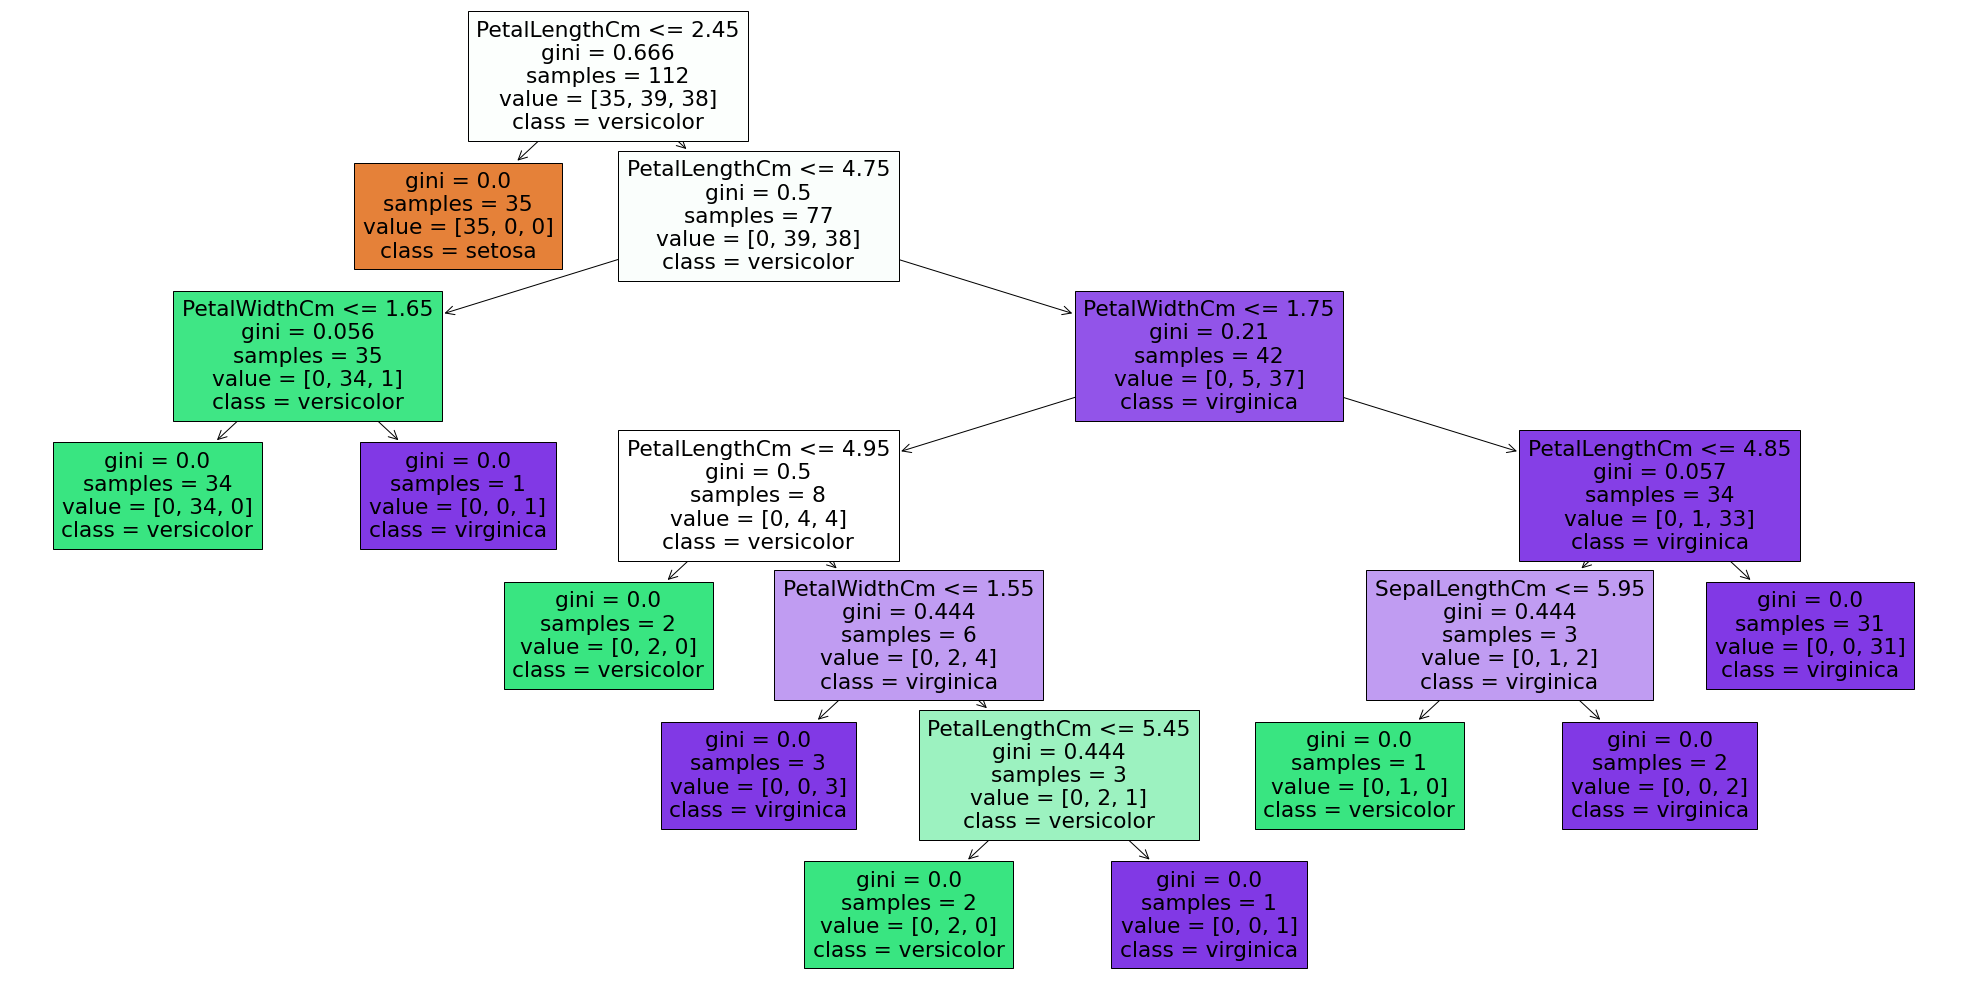

In [41]:
# Import the necessary modules for visualizing the decision tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(35, 18))

# Visualize the decision tree using the plot_tree function
plot_tree(clf,
          feature_names=["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"],
          class_names=["setosa", "versicolor", "virginica"],
          filled=True
         )

# Hyperparameter Tuning

In [42]:
# Define a dictionary 'param_grid' containing different hyperparameter values to search over

param_grid = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3,7,10],
    'min_samples_split' : [2,6,10],
    'min_samples_split' : [2,6,10],
    'max_features' : [1,2,3,4],
    'min_impurity_decrease' : [0.01, 0.05, 0.1],
    'max_leaf_nodes' : [1,2,3,4],
    'splitter' : ['random', 'best']
}

In [43]:
# Create a GridSearchCV object 'clf_hyp' to search for the best hyperparameters
# We are using the 'DecisionTreeClassifier' model, and we provide the 'param_grid' for hyperparameter combinations

clf_hyp = GridSearchCV(DecisionTreeClassifier(), param_grid=param_grid)

In [44]:
# Fit the 'GridSearchCV' object 'clf_hyp' to the training data
# 'X_train' contains the feature data for training
# 'y_train' contains the corresponding target variable data

clf_hyp.fit(X_train, y_train)

C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
2160 fits failed out of a total of 8640.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2160 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\dell\anaconda3\lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\dell\anaconda3\lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\dell\anaconda3\lib\site-packages

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 7, 10], 'max_features': [1, 2, 3, 4],
                         'max_leaf_nodes': [1, 2, 3, 4],
                         'min_impurity_decrease': [0.01, 0.05, 0.1],
                         'min_samples_split': [2, 6, 10],
                         'splitter': ['random', 'best']})

In [45]:
# 'clf_hyp.best_score_' represents the mean cross-validated score of the best-performing model during the grid search. 
# This score is an evaluation metric that indicates how well the model performed on validation sets during cross-validation.

best_score = clf_hyp.best_score_
print('Mean cross-validated accuracy of the best model found during the hyperparameter tuning process :', best_score)

Mean cross-validated accuracy of the best model found during the hyperparameter tuning process : 0.9549407114624506


In [46]:
# 'reg.best_params_' contains the set of hyperparameters that resulted in the best-performing model
best_hyperparameters = clf_hyp.best_params_
print('Best Hyperparameters:', )
print(best_hyperparameters)

Best Hyperparameters:
{'criterion': 'gini', 'max_depth': 7, 'max_features': 2, 'max_leaf_nodes': 3, 'min_impurity_decrease': 0.01, 'min_samples_split': 10, 'splitter': 'best'}


In [47]:
# Create an instance of DecisionTreeClassifier with the best hyperparameters
best_classifier = DecisionTreeClassifier(**best_hyperparameters)

In [48]:
# Fit the best classifier to the training data
best_classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, max_features=2, max_leaf_nodes=3,
                       min_impurity_decrease=0.01, min_samples_split=10)

### Visualize the decision tree of the best hyperparameters chosen

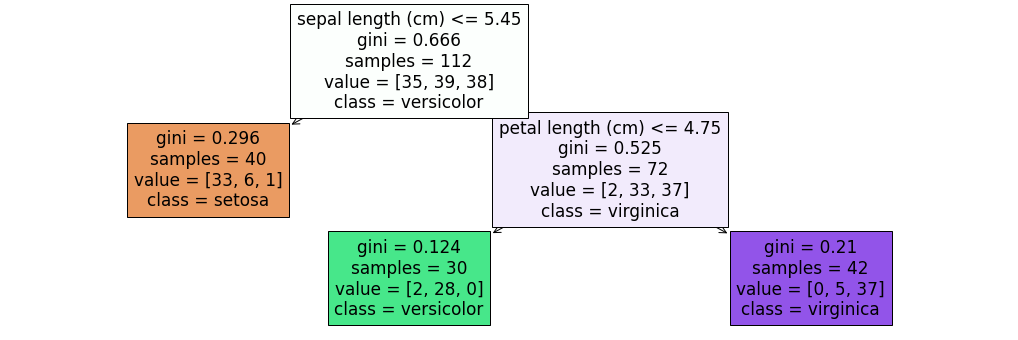

In [49]:
# Visualize the decision tree of the best hyperparameters chosen
import matplotlib.pyplot as plt
plt.figure(figsize=(18, 6))
plot_tree(best_classifier, 
          feature_names=["sepal length (cm)", "sepal width (cm)", "petal length (cm)", "petal width (cm)"], 
          class_names=["setosa", "versicolor", "virginica"], 
          filled=True)
plt.show()

In [50]:
# Define a function to get user input for Iris dataset features
def get_user_input():
    sepal_length = float(input("Enter Sepal Length (cm): "))
    sepal_width = float(input("Enter Sepal Width (cm): "))
    petal_length = float(input("Enter Petal Length (cm): "))
    petal_width = float(input("Enter Petal Width (cm): "))
    
    return [[sepal_length, sepal_width, petal_length, petal_width]]

# Get user input
user_data = get_user_input()

# Make predictions using clf_hyp
predicted_class = clf_hyp.predict(user_data)

# Map the predicted class to Iris species based on a dictionary
species_mapping = {0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'}
predicted_species = species_mapping[predicted_class[0]]

# Print the predicted Iris species
print("\n")
print(f"The predicted Iris species is: {predicted_species}")

print('\n\n\n\nProject End')

Enter Sepal Length (cm): 5.7
Enter Sepal Width (cm): 3
Enter Petal Length (cm): 4.2
Enter Petal Width (cm): 1.2


The predicted Iris species is: Versicolor




Project End


C:\Users\dell\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
